# REGRESSION MODEL for Metro Interstate Traffic Volume

### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing data and an overview of raw data

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.shape

(48204, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Explotary Data Analysis

### Handling Missing Values

In [7]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

There is no null values in data.

### Extracting Date/Time Features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [9]:
df['date_time'] = pd.to_datetime(df['date_time']) 


df['year'] = df['date_time'].dt.year              # Extract year
df['month'] = df['date_time'].dt.month            # Extract month
df['day'] = df['date_time'].dt.day                # Extract day
df['hour'] = df['date_time'].dt.hour              # Extract hour of the day
df['day_of_week'] = df['date_time'].dt.dayofweek  # Extract day of the week (Monday = 0, Sunday = 6)

In [10]:
df.drop('date_time', axis=1, inplace=True)

### Exploring the Numerical Columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
 8   year                 48204 non-null  int64  
 9   month                48204 non-null  int64  
 10  day                  48204 non-null  int64  
 11  hour                 48204 non-null  int64  
 12  day_of_week          48204 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 4.8+ MB


In [12]:
numeric_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'year', 'month', 'hour' , 'day' , 'day_of_week']
numeric_summary = df[numeric_cols].describe()
print(numeric_summary)

               temp       rain_1h       snow_1h    clouds_all  traffic_volume  \
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000   
mean     281.205870      0.334264      0.000222     49.362231     3259.818355   
std       13.338232     44.789133      0.008168     39.015750     1986.860670   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%      272.160000      0.000000      0.000000      1.000000     1193.000000   
50%      282.450000      0.000000      0.000000     64.000000     3380.000000   
75%      291.806000      0.000000      0.000000     90.000000     4933.000000   
max      310.070000   9831.300000      0.510000    100.000000     7280.000000   

               year         month          hour           day   day_of_week  
count  48204.000000  48204.000000  48204.000000  48204.000000  48204.000000  
mean    2015.512426      6.506037     11.398162     15.737636      2.984980  
std        1.893211      3.400221   

### Visualization

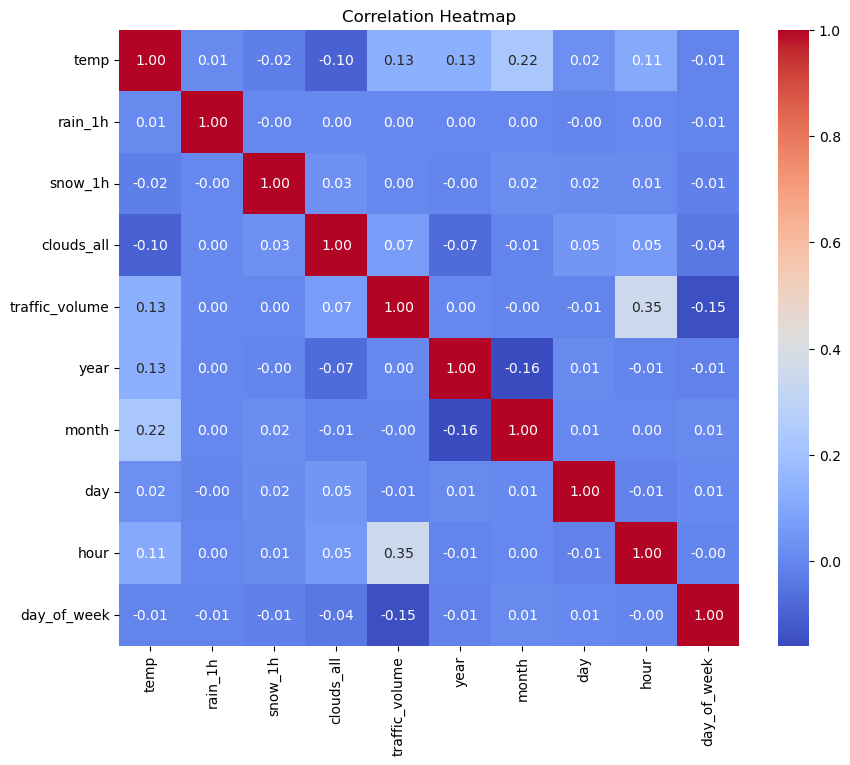

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


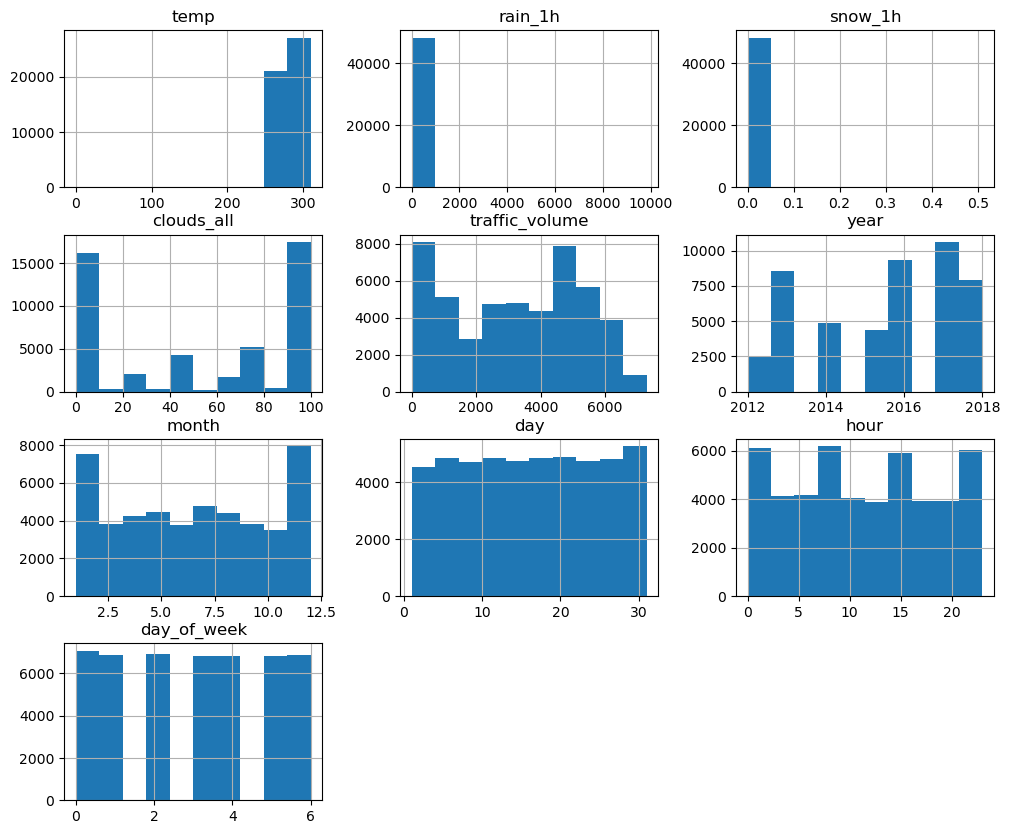

In [14]:
df.hist(figsize=(12,10))
plt.show()

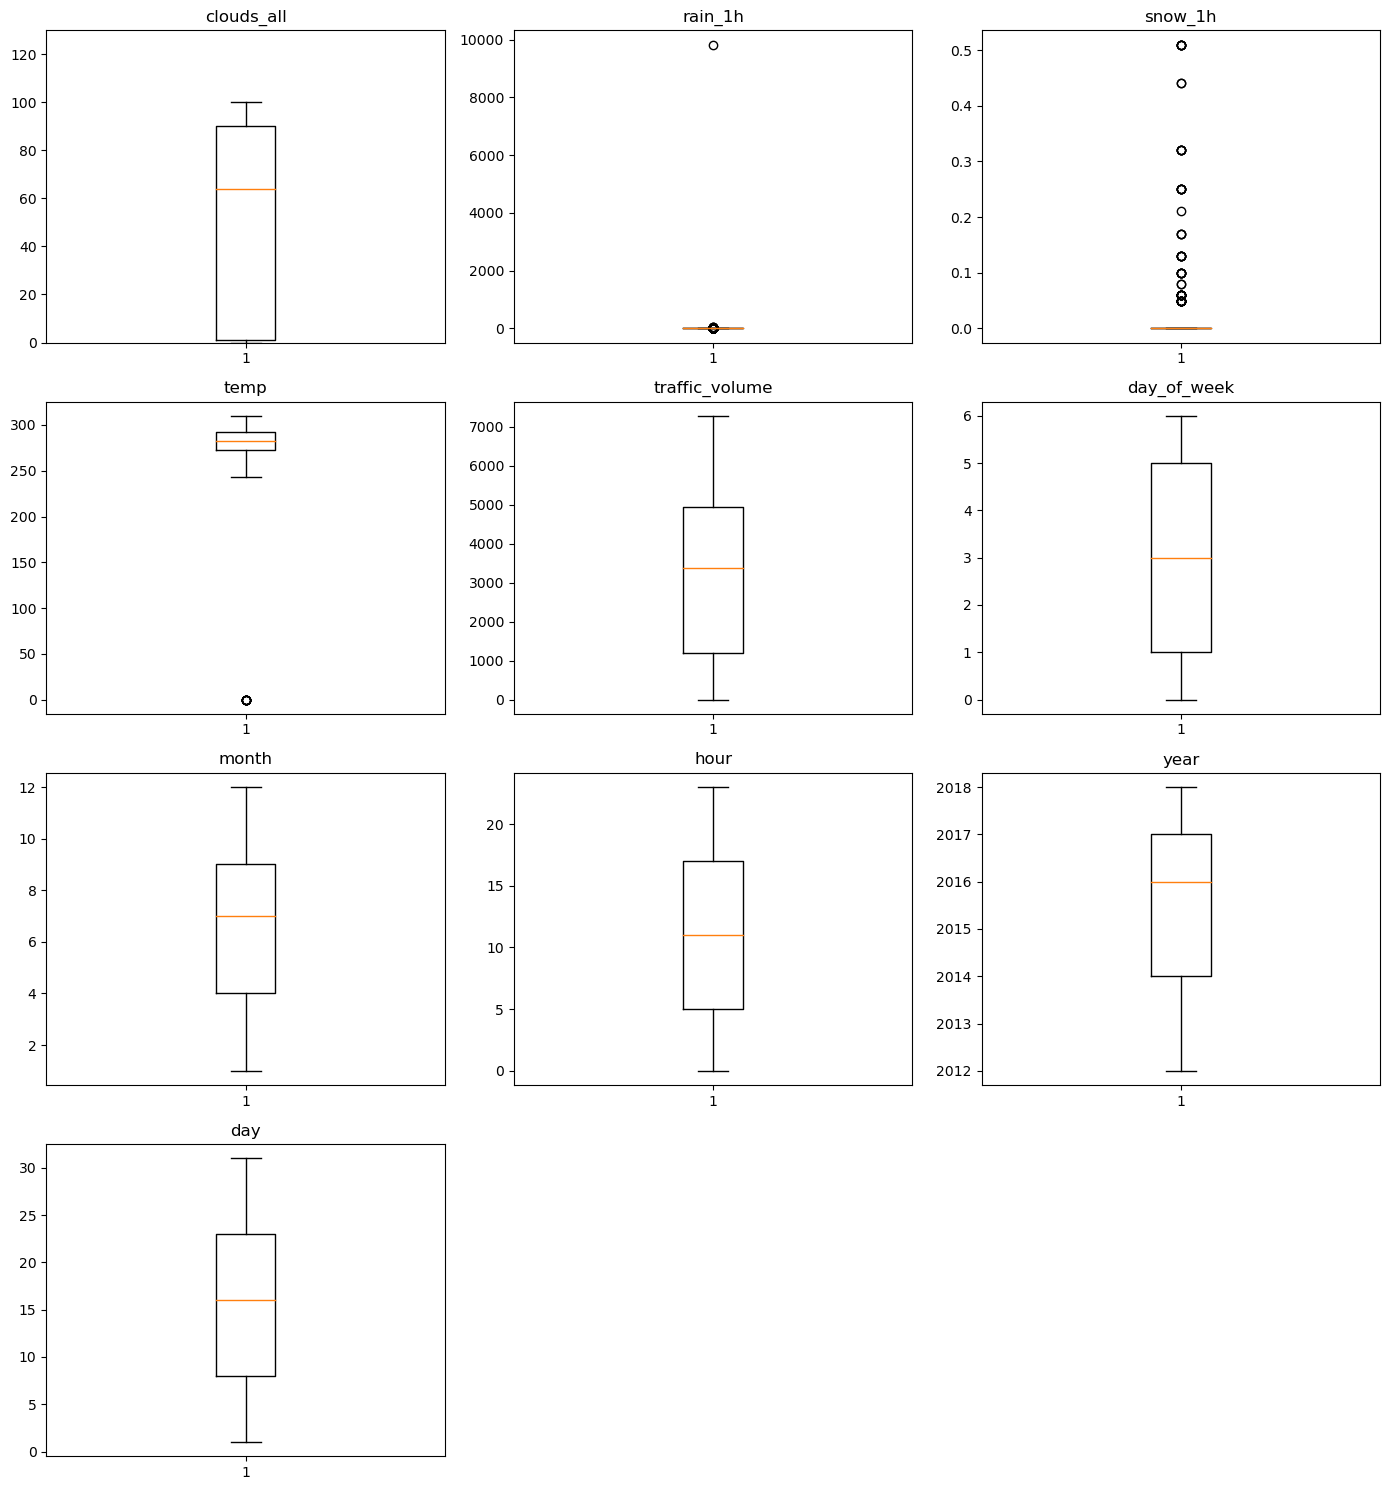

In [15]:
plt.figure(figsize=(14, 15))

plt.subplot(4, 3, 1)
plt.boxplot(df['clouds_all'])
plt.ylim(0, 130)
plt.title('clouds_all')

plt.subplot(4, 3, 2)
plt.boxplot(df['rain_1h'])
plt.title('rain_1h')

plt.subplot(4, 3, 3)
plt.boxplot(df['snow_1h'])
plt.title('snow_1h')

plt.subplot(4, 3, 4)
plt.boxplot(df['temp'])
plt.title('temp')

plt.subplot(4, 3, 5)
plt.boxplot(df['traffic_volume'])
plt.title('traffic_volume')

plt.subplot(4, 3, 6)
plt.boxplot(df['day_of_week'])
plt.title('day_of_week')

plt.subplot(4, 3, 7)
plt.boxplot(df['month'])
plt.title('month')

plt.subplot(4, 3, 8)
plt.boxplot(df['hour'])
plt.title('hour')

plt.subplot(4, 3, 9)
plt.boxplot(df['year'])
plt.title('year')

plt.subplot(4, 3, 10)
plt.boxplot(df['day'])
plt.title('day')

plt.tight_layout()
plt.show()



By looking at these boxplots, we can see that the outlier values ​​are in the 'temp' and 'rain_h1' columns.

### Exploring the Categorical Columns

In [16]:
holiday_categories = df['holiday'].unique()
weather_main_categories = df['weather_main'].unique()
weather_description_categories = df['weather_description'].unique()

print("Holiday Counts:")
print(holiday_categories)

print("\nWeather Main Counts:")
print(weather_main_categories)

print("\nWeather Description Counts:")
print(weather_description_categories)

Holiday Counts:
['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']

Weather Main Counts:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']

Weather Description Counts:
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'light 

In [17]:
holiday_counts = df['holiday'].value_counts()
weather_main_counts = df['weather_main'].value_counts()
weather_description_counts = df['weather_description'].value_counts()

print("Holiday Counts:")
print(holiday_counts)

print("\nWeather Main Counts:")
print(weather_main_counts)

print("\nWeather Description Counts:")
print(weather_description_counts)


Holiday Counts:
None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

Weather Main Counts:
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

Weather Description Counts:
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds              

### Identifying Outliers

We can use Z-score to find outliers.

Z-scores are commonly used in identifying outliers within a dataset. Outliers are data points that significantly differ from the majority of the data. While there isn't a fixed threshold universally defining an outlier in terms of Z-scores, a common practice is to consider data points with Z-scores beyond a certain threshold as outliers.

A Z-score threshold of around ±3 is often used as a guideline to identify potential outliers. This means that any data point with a Z-score greater than +3 or less than -3 might be considered an outlier.

In [18]:
from scipy.stats import zscore

# For 'temp' column
z_scores_temp = zscore(df['temp'])
threshold = 3  

outliers_temp = df[abs(z_scores_temp) > threshold]['temp']
print("Outliers based on Z-score in 'temp' column:")
print(outliers_temp)


Outliers based on Z-score in 'temp' column:
11898    0.0
11899    0.0
11900    0.0
11901    0.0
11946    0.0
11947    0.0
11948    0.0
11949    0.0
11950    0.0
11951    0.0
Name: temp, dtype: float64


In [19]:
# For 'rain_1h' column
z_scores_temp = zscore(df['rain_1h'])
threshold = 3  

outliers_temp = df[abs(z_scores_temp) > threshold]['rain_1h']
print("Outliers based on Z-score in 'rain_1h' column:")
print(outliers_temp)

Outliers based on Z-score in 'rain_1h' column:
24872    9831.3
Name: rain_1h, dtype: float64


### Handling Outliers

#### For 'rain_1h' column

In [20]:
df.loc[df['rain_1h']==9831.3]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week
24872,None,302.11,9831.3,0.0,75,Rain,very heavy rain,5535,2016,7,11,17,0


In [21]:
df[df['weather_description']=='very heavy rain']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week
7133,None,291.76,16.38,0.0,76,Rain,very heavy rain,635,2013,6,22,5,5
7179,None,295.82,44.45,0.0,76,Rain,very heavy rain,4802,2013,6,24,11,0
7664,None,292.82,19.90,0.0,20,Rain,very heavy rain,542,2013,7,14,5,6
7667,None,292.65,25.32,0.0,8,Rain,very heavy rain,958,2013,7,14,6,6
7670,None,292.87,21.42,0.0,90,Rain,very heavy rain,1745,2013,7,14,7,6
8247,None,289.10,55.63,0.0,68,Rain,very heavy rain,315,2013,8,7,2,2
10734,None,262.65,18.80,0.0,64,Rain,very heavy rain,2755,2013,12,16,19,0
10806,None,264.50,28.70,0.0,64,Rain,very heavy rain,1190,2013,12,19,23,3
14853,None,298.21,18.03,0.0,0,Rain,very heavy rain,6443,2014,6,2,16,0
16300,None,294.87,23.80,0.0,90,Rain,very heavy rain,346,2015,7,6,3,0


In [22]:
median_rain_1h_excluded = df['rain_1h'][(df['weather_description']=='very heavy rain') & (df.index != 24872)].median()

print(median_rain_1h_excluded)

21.42


In [23]:
df.loc[df['rain_1h'] == 9831.3, 'rain_1h'] = median_rain_1h_excluded

#### For 'temp' column

In [24]:
df[df['temp']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,361,2014,1,31,3,4
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,734,2014,1,31,4,4
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2557,2014,1,31,5,4
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,5150,2014,1,31,6,4
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,291,2014,2,2,3,6
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,284,2014,2,2,4,6
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,434,2014,2,2,5,6
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,739,2014,2,2,6,6
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,962,2014,2,2,7,6
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,1670,2014,2,2,8,6


In [25]:
df[(df['year'] == 2014) & (df['month'] == 1) & (df['day'] == 31)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week
11895,None,255.93,0.00,0.0,0,Clear,sky is clear,644,2014,1,31,0,4
11896,None,255.93,0.00,0.0,0,Clear,sky is clear,390,2014,1,31,1,4
11897,None,255.93,0.00,0.0,0,Clear,sky is clear,313,2014,1,31,2,4
11898,None,0.00,0.00,0.0,0,Clear,sky is clear,361,2014,1,31,3,4
11899,None,0.00,0.00,0.0,0,Clear,sky is clear,734,2014,1,31,4,4
11900,None,0.00,0.00,0.0,0,Clear,sky is clear,2557,2014,1,31,5,4
11901,None,0.00,0.00,0.0,0,Clear,sky is clear,5150,2014,1,31,6,4
11902,None,255.93,0.00,0.0,0,Clear,sky is clear,5363,2014,1,31,7,4
11903,None,255.93,0.00,0.0,0,Clear,sky is clear,5269,2014,1,31,8,4
11904,None,255.93,0.00,0.0,0,Clear,sky is clear,4721,2014,1,31,9,4


In [26]:
df['temp'][(df['year'] == 2014) & (df['month'] == 1) & (df['day'] == 31) & (df['temp'] == 0)] = 255.93

In [27]:
df[(df['year'] == 2014) & (df['month'] == 2) & (df['day'] == 2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week
11943,None,255.59,0.0,0.0,0,Clear,sky is clear,1143,2014,2,2,0,6
11944,None,255.48,0.0,0.0,0,Clear,sky is clear,695,2014,2,2,1,6
11945,None,255.37,0.0,0.0,0,Clear,sky is clear,539,2014,2,2,2,6
11946,None,0.00,0.0,0.0,0,Clear,sky is clear,291,2014,2,2,3,6
11947,None,0.00,0.0,0.0,0,Clear,sky is clear,284,2014,2,2,4,6
11948,None,0.00,0.0,0.0,0,Clear,sky is clear,434,2014,2,2,5,6
11949,None,0.00,0.0,0.0,0,Clear,sky is clear,739,2014,2,2,6,6
11950,None,0.00,0.0,0.0,0,Clear,sky is clear,962,2014,2,2,7,6
11951,None,0.00,0.0,0.0,0,Clear,sky is clear,1670,2014,2,2,8,6
11952,None,255.62,0.0,0.0,0,Clear,sky is clear,2506,2014,2,2,9,6


In [28]:
np.round(np.linspace(255.41,255.62,6,endpoint=False),2)

array([255.41, 255.44, 255.48, 255.52, 255.55, 255.58])

In [29]:
df['temp'][(df['year'] == 2014) & (df['month'] == 2) & (df['day'] == 2) & (df['temp'] == 0)] = [i for i in np.round(np.linspace(255.41,255.62,6,endpoint=False),2)]

In [30]:
df[df['temp']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,day_of_week


## Encoding Categorical Variables

### One Hot Encoding

One-hot encoding is a technique used in machine learning and data processing to convert categorical data, represented as labels or categories, into a numerical format that algorithms can better understand.

In [31]:
categorical_columns = ['holiday', 'weather_main', 'weather_description']

for col in categorical_columns:
    df[col] = df[col].astype('category')

one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [32]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 68 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   temp                                                     48204 non-null  float64
 1   rain_1h                                                  48204 non-null  float64
 2   snow_1h                                                  48204 non-null  float64
 3   clouds_all                                               48204 non-null  int64  
 4   traffic_volume                                           48204 non-null  int64  
 5   year                                                     48204 non-null  int64  
 6   month                                                    48204 non-null  int64  
 7   day                                                      48204 non-null  int64  
 8   hour                      

In [33]:
one_hot_encoded_df.to_csv('one_hot_encoded_data.csv', index=False)

### Label Encoding

Label encoding is a technique used to convert categorical data into numerical format. It assigns a unique numerical value to each category or label within a categorical column.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoded_df = df.copy()

In [36]:
label_encoder = LabelEncoder()

label_encoded_df['weather_main_encoded'] = label_encoder.fit_transform(df['weather_main'])
label_encoded_df['weather_description_encoded'] = label_encoder.fit_transform(df['weather_description'])
label_encoded_df['holiday_encoded'] = label_encoder.fit_transform(df['holiday'])

In [37]:
label_encoded_df = label_encoded_df.drop(['holiday','weather_description','weather_main'], axis=1)

In [38]:
label_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temp                         48204 non-null  float64
 1   rain_1h                      48204 non-null  float64
 2   snow_1h                      48204 non-null  float64
 3   clouds_all                   48204 non-null  int64  
 4   traffic_volume               48204 non-null  int64  
 5   year                         48204 non-null  int64  
 6   month                        48204 non-null  int64  
 7   day                          48204 non-null  int64  
 8   hour                         48204 non-null  int64  
 9   day_of_week                  48204 non-null  int64  
 10  weather_main_encoded         48204 non-null  int32  
 11  weather_description_encoded  48204 non-null  int32  
 12  holiday_encoded              48204 non-null  int32  
dtypes: float64(3), i

In [39]:
label_encoded_df.to_csv('label_encoded_data.csv', index=False)

### Not Encoded

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   holiday              48204 non-null  category
 1   temp                 48204 non-null  float64 
 2   rain_1h              48204 non-null  float64 
 3   snow_1h              48204 non-null  float64 
 4   clouds_all           48204 non-null  int64   
 5   weather_main         48204 non-null  category
 6   weather_description  48204 non-null  category
 7   traffic_volume       48204 non-null  int64   
 8   year                 48204 non-null  int64   
 9   month                48204 non-null  int64   
 10  day                  48204 non-null  int64   
 11  hour                 48204 non-null  int64   
 12  day_of_week          48204 non-null  int64   
dtypes: category(3), float64(3), int64(7)
memory usage: 3.8 MB


In [41]:
no_encode_df = df.drop(['holiday','weather_description','weather_main'], axis=1)

In [42]:
no_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48204 non-null  float64
 1   rain_1h         48204 non-null  float64
 2   snow_1h         48204 non-null  float64
 3   clouds_all      48204 non-null  int64  
 4   traffic_volume  48204 non-null  int64  
 5   year            48204 non-null  int64  
 6   month           48204 non-null  int64  
 7   day             48204 non-null  int64  
 8   hour            48204 non-null  int64  
 9   day_of_week     48204 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.7 MB


In [43]:
no_encode_df.to_csv('not_encoded_data.csv', index=False)

## Splitting Data into Training and Test Sets

Splitting data into training and test sets is a fundamental step in building machine learning models. The purpose is to assess the performance of the model on unseen data after it's been trained on a separate portion of the dataset.

The primary goal of splitting data is to evaluate how well the model generalizes to new, unseen data. By training the model on one portion of the dataset (the training set) and evaluating its performance on another portion (the test set), you can estimate how well the model will perform on new data.

### For One Hot Encoded

In [44]:
from sklearn.model_selection import train_test_split

X1 = one_hot_encoded_df.drop('traffic_volume', axis=1) 
y1 = one_hot_encoded_df['traffic_volume']  

# Split the data into training and testing sets (80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print("Shapes of X1_train, X1_test, y1_train, y1_test:")
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)


Shapes of X1_train, X1_test, y1_train, y1_test:
(38563, 67) (9641, 67) (38563,) (9641,)


### For Label Encoded

In [45]:
from sklearn.model_selection import train_test_split

X2 = label_encoded_df.drop('traffic_volume', axis=1)  
y2 = label_encoded_df['traffic_volume']  

# Split the data into training and testing sets (80% train, 20% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print("Shapes of X2_train, X2_test, y2_train, y2_test:")
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

Shapes of X2_train, X2_test, y2_train, y2_test:
(38563, 12) (9641, 12) (38563,) (9641,)


### For No Encoded

In [46]:
from sklearn.model_selection import train_test_split

X = no_encode_df.drop('traffic_volume', axis=1) 
y = no_encode_df['traffic_volume']  

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of X_train, X_test, y_train, y_test:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes of X_train, X_test, y_train, y_test:
(38563, 9) (9641, 9) (38563,) (9641,)


## Model Training and Selection

Model training and evaluation are essential stages in the machine learning workflow. They involve training a machine learning model using the training dataset and assessing its performance using various evaluation metrics.

 + **Linear Regression =** Linear regression is a foundational and widely-used statistical method used in machine learning for predictive analysis. It's employed to model the relationship between a dependent variable (target) and one or more independent variables (predictors) by fitting a linear equation to the observed data.
 
 + **Decision Tree =** Decision Trees are versatile and powerful supervised learning algorithms used for both regression and classification tasks in machine learning. Decision Trees create a hierarchical tree structure where each node represents a feature, each branch a decision rule, and each leaf node an output (prediction).
 
 + **Random Forest =** Random Forest is a versatile and powerful machine learning algorithm widely used for both regression and classification tasks. It belongs to the ensemble learning methods and operates by constructing multiple decision trees during training and outputting the mean prediction (regression) or the mode of the predictions (classification) of individual trees.
 
 + **Gradient Boosting =** Gradient Boosting is an ensemble learning technique used for building powerful predictive models. It works by combining multiple weak learners (often decision trees) sequentially to create a strong predictive model.
 
 + **Support Vector =** Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. They work well for both linearly separable and non-linearly separable data through the use of kernel functions.


In [47]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()

### Linear Regression

Linear Regression Evaluation for One Hot Encoded dataset:
Mean Squared Error: 3261265.6258727363
R-squared Score: 0.17509689112324256


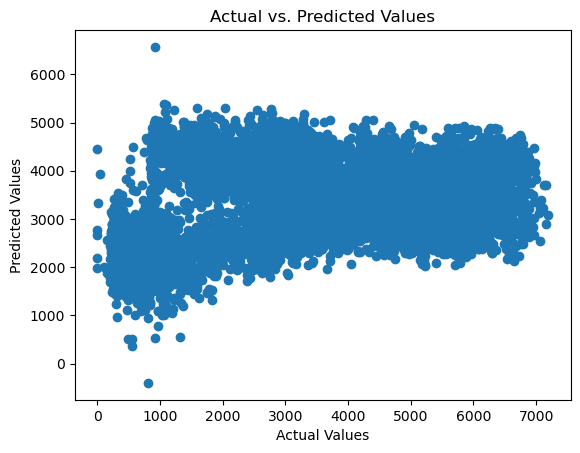


Linear Regression Evaluation for Label Encoded dataset:
Mean Squared Error: 3289874.5909814546
R-squared Score: 0.16786055193249882


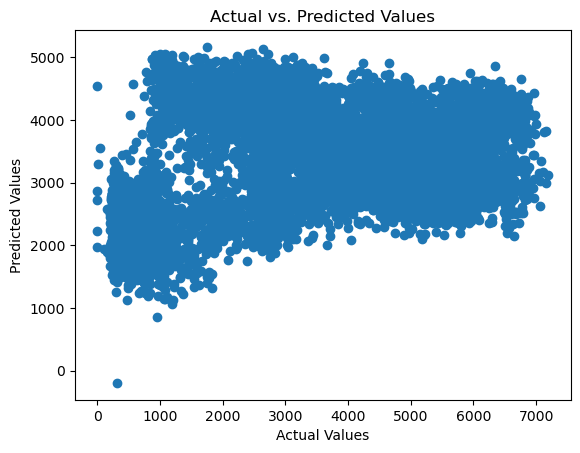


Linear Regression Evaluation for Not Encoded dataset:
Mean Squared Error: 3311054.4077496077
R-squared Score: 0.16250333829160923


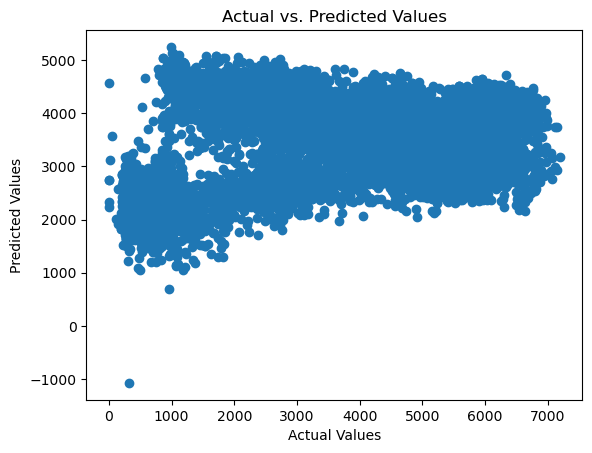

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# One Hot Encoded
print("Linear Regression Evaluation for One Hot Encoded dataset:")
evaluate_model(model, X1_train, X1_test, y1_train, y1_test)

# Label Encoded
print("\nLinear Regression Evaluation for Label Encoded dataset:")
evaluate_model(model, X2_train, X2_test, y2_train, y2_test)

# Not Encoded
print("\nLinear Regression Evaluation for Not Encoded dataset:")
evaluate_model(model, X_train, X_test, y_train, y_test)


### Decision Tree

Decision Tree Evaluation for One Hot Encoded dataset:
Mean Squared Error: 241391.73643812884
R-squared Score: 0.9389424791819329


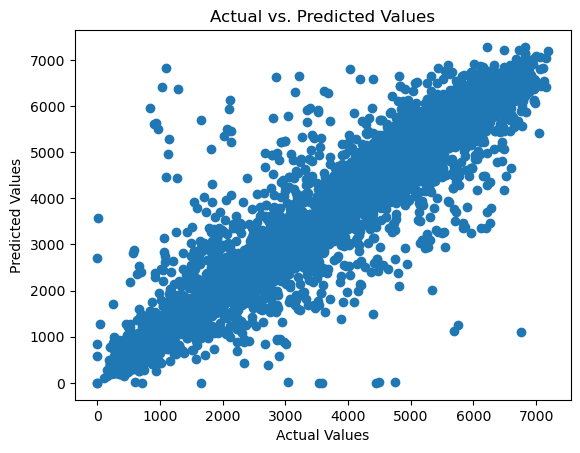


Decision Tree Evaluation for Label Encoded dataset:
Mean Squared Error: 231201.37496110363
R-squared Score: 0.9415200247814964


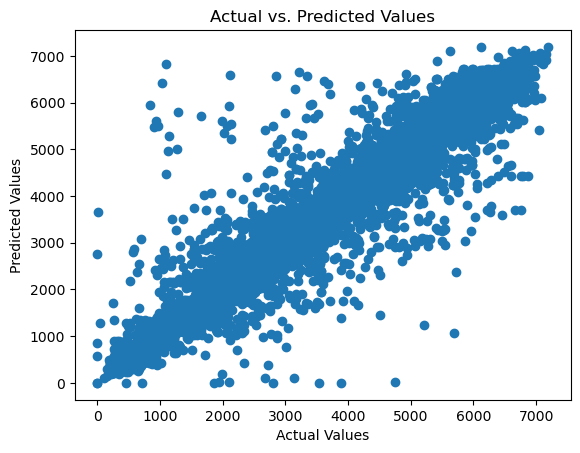


Decision Tree Evaluation for Not Encoded dataset:
Mean Squared Error: 216062.28451405457
R-squared Score: 0.9453492997342213


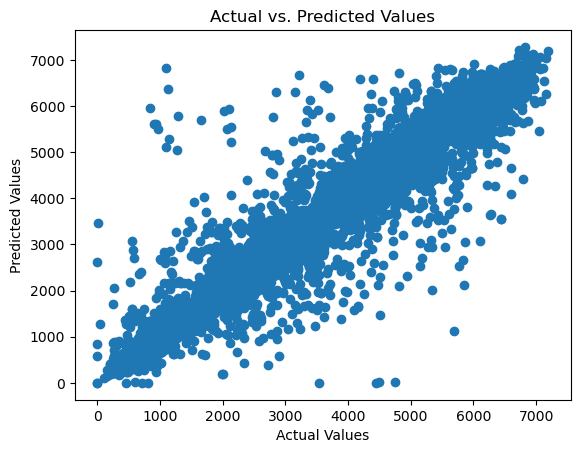

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor()

# One Hot Encoded
print("Decision Tree Evaluation for One Hot Encoded dataset:")
evaluate_model(model,X1_train, X1_test, y1_train, y1_test)

# Label Encoded
print("\nDecision Tree Evaluation for Label Encoded dataset:")
evaluate_model(model,X2_train, X2_test, y2_train, y2_test)

# Not Encoded
print("\nDecision Tree Evaluation for Not Encoded dataset:")
evaluate_model(model,X_train, X_test, y_train, y_test)


### Random Forest (One Hot Encoded)

Random Forest Evaluation for One Hot Encoded dataset:
Mean Squared Error: 140838.9131544964
R-squared Score: 0.9643762665664875


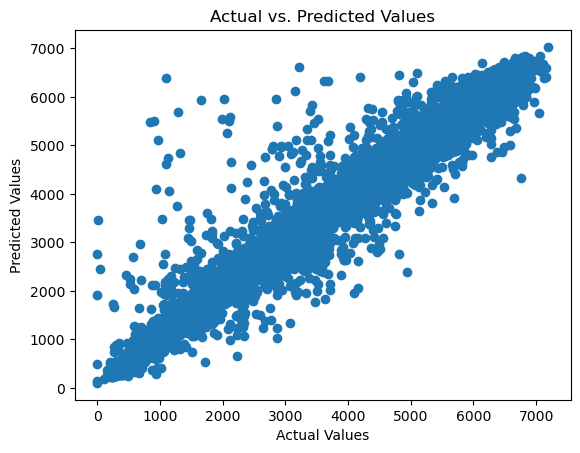


Random Forest Evaluation for Label Encoded dataset:
Mean Squared Error: 134308.7741987657
R-squared Score: 0.9660279970735779


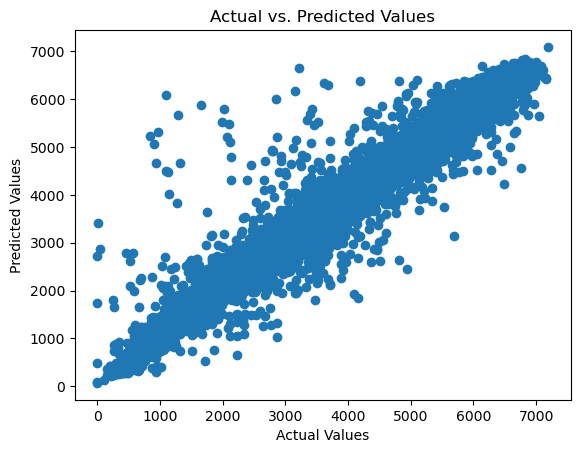


Random Forest Evaluation for Not Encoded dataset:
Mean Squared Error: 127020.32462530858
R-squared Score: 0.9678715343384787


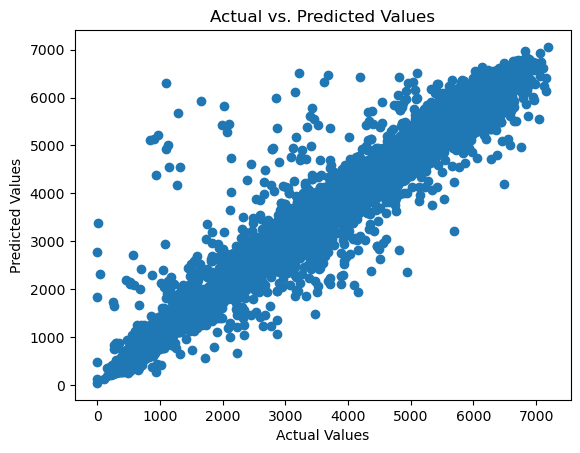

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()

# One Hot Encoded
print("Random Forest Evaluation for One Hot Encoded dataset:")
evaluate_model(model,X1_train, X1_test, y1_train, y1_test)

# Label Encoded
print("\nRandom Forest Evaluation for Label Encoded dataset:")
evaluate_model(model,X2_train, X2_test, y2_train, y2_test)

# Not Encoded
print("\nRandom Forest Evaluation for Not Encoded dataset:")
evaluate_model(model,X_train, X_test, y_train, y_test)


### Gradient Boosting (One Hot Encoded)

Gradient Boosting Evaluation for One Hot Encoded dataset:
Mean Squared Error: 310262.6994103921
R-squared Score: 0.9215222877640833


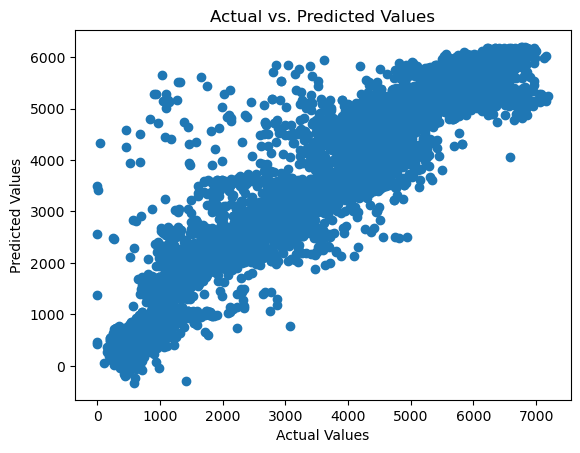


Gradient Boosting Evaluation for Label Encoded dataset:
Mean Squared Error: 302281.02832503134
R-squared Score: 0.923541168176679


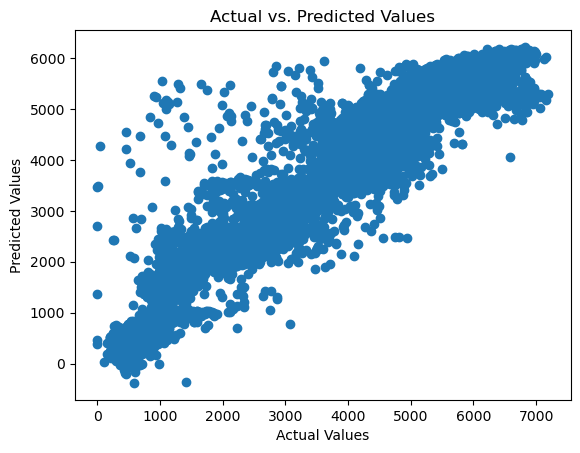


Gradient Boosting Evaluation for Not Encoded dataset:
Mean Squared Error: 311437.7209380623
R-squared Score: 0.9212250783299659


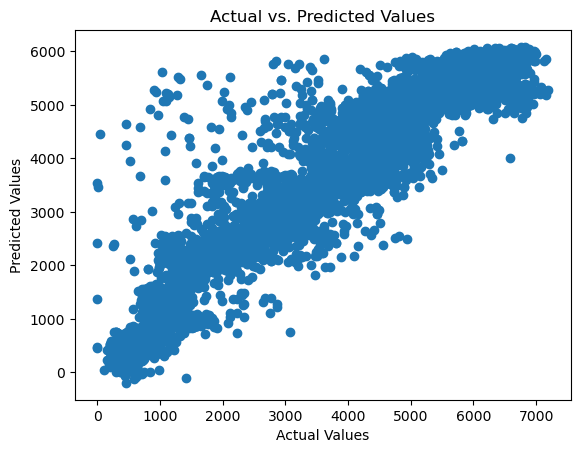

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor()


# One Hot Encoded
print("Gradient Boosting Evaluation for One Hot Encoded dataset:")
evaluate_model(model,X1_train, X1_test, y1_train, y1_test)

# Label Encoded
print("\nGradient Boosting Evaluation for Label Encoded dataset:")
evaluate_model(model,X2_train, X2_test, y2_train, y2_test)

# Not Encoded
print("\nGradient Boosting Evaluation for Not Encoded dataset:")
evaluate_model(model,X_train, X_test, y_train, y_test)


### Support Vector (One Hot Encoded)

Support Vector Evaluation for One Hot Encoded dataset:
Mean Squared Error: 3697375.4410299263
R-squared Score: 0.06478746416923198


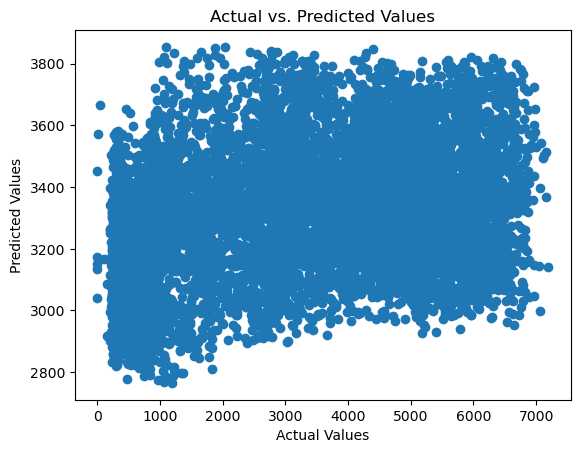


Support Vector Evaluation for Label Encoded dataset:
Mean Squared Error: 3196189.801976128
R-squared Score: 0.19155714171404292


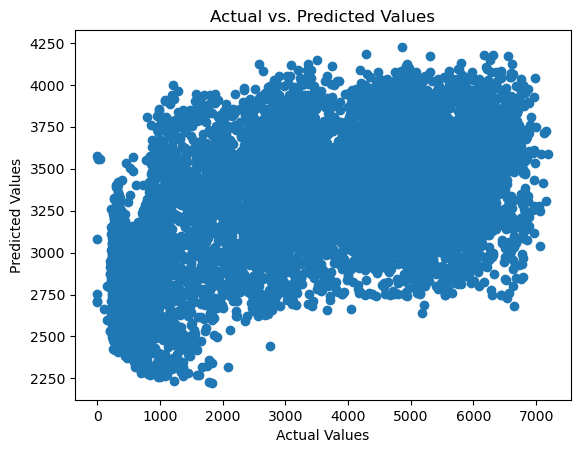


Support Vector Evaluation for Not Encoded dataset:
Mean Squared Error: 2962615.276710749
R-squared Score: 0.2506373805382761


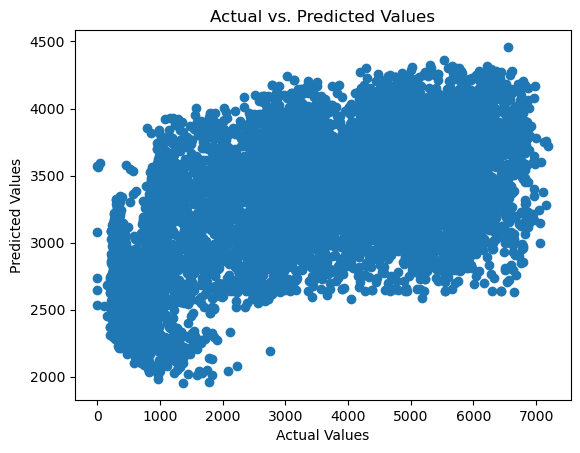

In [52]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features using StandardScaler for dataset 1
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Scale the features using StandardScaler for dataset 2
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Scale the features using StandardScaler for dataset 3
scaler3 = StandardScaler()
X_train_scaled = scaler3.fit_transform(X_train)
X_test_scaled = scaler3.transform(X_test)

model = SVR()

# One Hot Encoded
print("Support Vector Evaluation for One Hot Encoded dataset:")
evaluate_model(model,X1_train_scaled, X1_test_scaled, y1_train, y1_test)

# Label Encoded
print("\nSupport Vector Evaluation for Label Encoded dataset:")
evaluate_model(model,X2_train_scaled, X2_test_scaled, y2_train, y2_test)

# Not Encoded
print("\nSupport Vector Evaluation for Not Encoded dataset:")
evaluate_model(model,X_train_scaled, X_test_scaled, y_train, y_test)


## Model Tuning and Improvement

Model tuning and improvement involve enhancing the performance of machine learning models by adjusting various parameters, algorithms, or data preprocessing techniques. The primary goal is to optimize the model's performance, making it more accurate and efficient.

Based on their respective performances across different encoding methods:

**Random Forest with One Hot Encoding** shows the best performance overall, with the lowest MSE and highest R-squared score among all models and encodings.

**Gradient Boosting with Label Encoding** comes second in performance, showing a good R-squared score but higher MSE compared to Random Forest.

**Decision Tree with Not Encoded data** also demonstrates strong performance, particularly in terms of R-squared score, although its MSE is higher than Random Forest and slightly higher than Gradient Boosting.

 + **Random Forest (One Hot Encoded):**<br>
   Mean Squared Error: 140873.41936112437<br>
   R-squared Score: 0.964367538581592
   
 + **Decision Tree (Not Encoded):**<br>
   Mean Squared Error: 229138.85883207136<br>
   R-squared Score: 0.9420417167140546
   
 + **Gradient Boosting (Label Encoded):**<br>
   Mean Squared Error: 302290.57742668106<br>
   R-squared Score: 0.9235387528310611
 


### Random Forest (One Hot Encoded)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder


rf = RandomForestRegressor()

# The hyperparameters
param_grid = {
    'n_estimators': [150],  # [50, 100, 150]
    'max_depth': [30],  # [10, 20, 30]
    'min_samples_split': [5],  # [2, 5, 10, 20]
    'min_samples_leaf': [2]  # [2, 4, 8]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, y1_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X1_train, y1_train)

y_pred_rf = best_rf.predict(X1_test)

mse = mean_squared_error(y1_test, y_pred_rf)
print("Mean Squared Error:", mse)

r_squared = r2_score(y1_test, y_pred_rf)
print("R-squared Score:", r_squared)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error: 139482.46694603495
R-squared Score: 0.9647193654804511


In [54]:
best_rf.fit(X1_train, y1_train)

feature_importances = best_rf.feature_importances_

feature_names = list(X1_train.columns)
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Top 10 important features
top_n = 10 
print(f"Top {top_n} Important Features:")
for feature, importance in sorted_importance[:top_n]:
    print(f"{feature}: {importance}")


Top 10 Important Features:
hour: 0.8331429564777239
day_of_week: 0.11049603409566972
temp: 0.01606560887965889
day: 0.014695790472419546
month: 0.009867891615466974
year: 0.005250734387511226
clouds_all: 0.0027099557313214873
rain_1h: 0.002095817241283981
weather_main_Clouds: 0.0006828404297272643
weather_description_overcast clouds: 0.00048377742291254473


In [55]:
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X1_train, y1_train, cv=k_fold, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  

mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_mse}")
print(f"Cross-Validation Standard Deviation of MSE: {std_cv_mse}")


Cross-Validation Mean MSE: 153652.12962473687
Cross-Validation Standard Deviation of MSE: 9395.994046765301


In [56]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y1_test, y_pred_rf)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 202.1053685500152


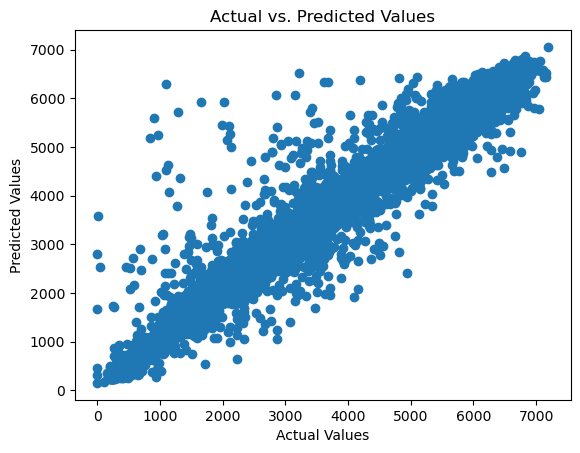

In [57]:
import matplotlib.pyplot as plt

plt.scatter(y1_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


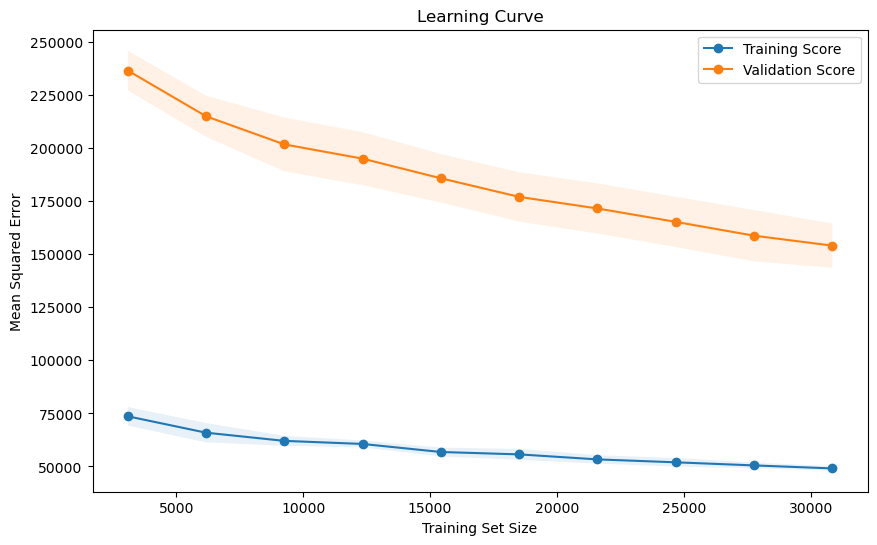

In [58]:
from sklearn.model_selection import learning_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores = -train_scores
test_scores = -test_scores


mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
std_test_scores = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_train_scores, label='Training Score', marker='o')
plt.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1)

plt.plot(train_sizes, mean_test_scores, label='Validation Score', marker='o')
plt.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [59]:
# Bias Error
bias_error = np.mean(y1_test) - np.mean(y_pred_rf)
print('Bias Error')
print('Actual value :', np.mean(y1_test))
print('Predicted value :', np.mean(y_pred_rf))
print('Bias Error:', bias_error)

# Variance Error
variance_error_actual = np.var(y1_test, ddof=1)
variance_error_pred = np.var(y_pred_rf, ddof=1)
print('\nVariance Error')
print('Actual value :', variance_error_actual)
print('Predicted value :', variance_error_pred)
print('Variance Error:', variance_error_actual - variance_error_pred)


Bias Error
Actual value : 3273.8314490198113
Predicted value : 3270.161733866647
Bias Error: 3.6697151531643613

Variance Error
Actual value : 3953923.6745959246
Predicted value : 3777434.9113414646
Variance Error: 176488.76325445995


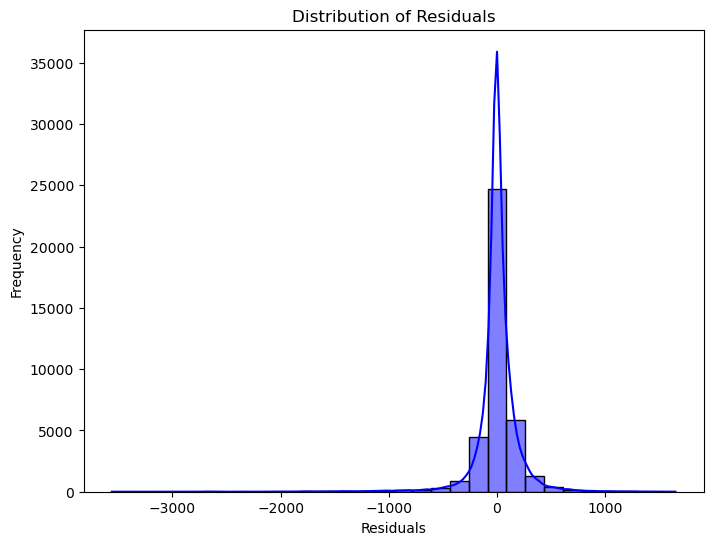

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
best_rf.fit(X1_train, y1_train)

y_train_pred_rf = best_rf.predict(X1_train)

residuals = y1_train - y_train_pred_rf

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Decision Tree (Not Encoded)

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# The hyperparameters
param_grid = {
    'max_depth': [20],  # [10, 20, 30]
    'min_samples_split': [10],  # [2, 5, 10, 20]
    'min_samples_leaf': [4]  # [2, 4, 8]
}

dt = DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(X_train, y_train)

y_pred_dt = best_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
r_squared = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 187197.30729405754
R-squared Score: 0.952650394517036


In [62]:
best_rf.fit(X_train, y_train)

feature_importances = best_rf.feature_importances_

feature_names = list(X_train.columns)  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Top 10 important features
top_n = 10 
print(f"Top {top_n} Important Features:")
for feature, importance in sorted_importance[:top_n]:
    print(f"{feature}: {importance}")

Top 10 Important Features:
hour: 0.8330234613143382
day_of_week: 0.11064909489349514
temp: 0.017618106238704564
day: 0.01603714579274784
month: 0.010755772985278486
year: 0.005861428710110448
clouds_all: 0.0037563594943407965
rain_1h: 0.002267808845509898
snow_1h: 3.082172547457034e-05


In [63]:
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  

mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_mse}")
print(f"Cross-Validation Standard Deviation of MSE: {std_cv_mse}")

Cross-Validation Mean MSE: 143917.07217411726
Cross-Validation Standard Deviation of MSE: 8833.732861727329


In [64]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 240.07053682436646


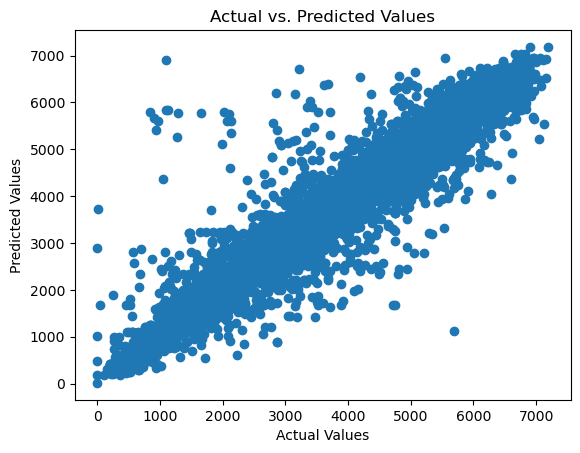

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

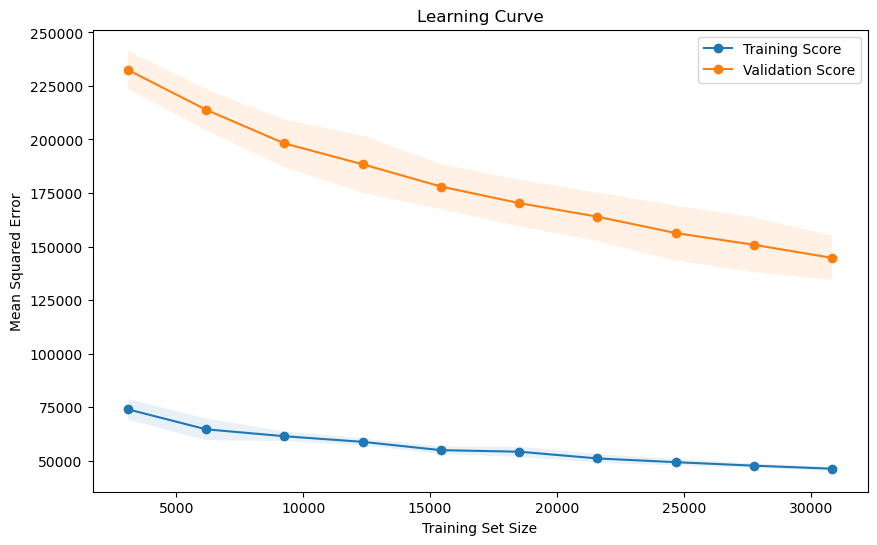

In [66]:
from sklearn.model_selection import learning_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores = -train_scores
test_scores = -test_scores

mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
std_test_scores = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_train_scores, label='Training Score', marker='o')
plt.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1)

plt.plot(train_sizes, mean_test_scores, label='Validation Score', marker='o')
plt.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

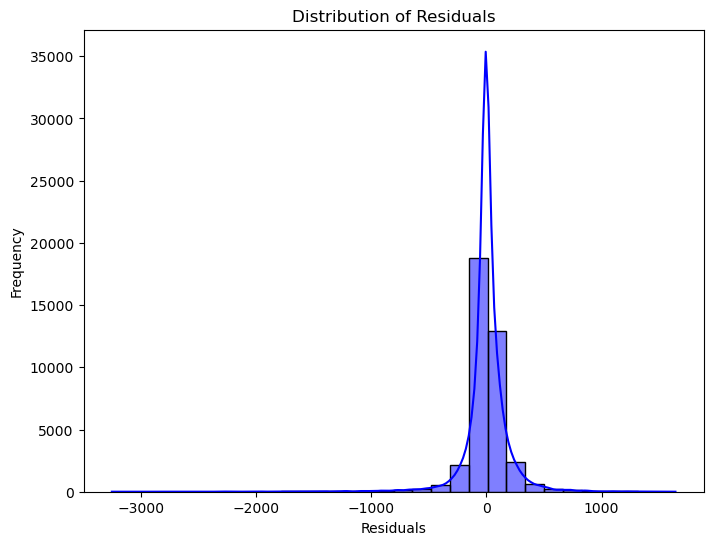

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resudials
best_rf.fit(X_train, y_train)

y_train_pred_dt = best_rf.predict(X_train)

residuals = y_train - y_train_pred_dt

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Gradient Boosting (Label Encoded)

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X2_train_encoded = X2_train.copy()
X2_test_encoded = X2_test.copy()

for col in X2_train.columns:
    if X2_train[col].dtype == 'object':
        X2_train_encoded[col] = label_encoder.fit_transform(X2_train[col])
        X2_test_encoded[col] = label_encoder.transform(X2_test[col])

# The hyperparameters
param_grid = {
    'n_estimators': [150],      # [50, 100, 150]
    'learning_rate': [0.2],     # [0.01, 0.1, 0.2, 0.5, 1.0]
    'max_depth': [11]           # [3, 5, 7, 11, 13] 
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X2_train_encoded, y2_train)

# Best paramaters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_gb = GradientBoostingRegressor(**best_params)
best_gb.fit(X2_train_encoded, y2_train)

y_pred_gb = best_gb.predict(X2_test_encoded)

mse = mean_squared_error(y2_test, y_pred_gb)
r_squared = r2_score(y2_test, y_pred_gb)

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 150}
Mean Squared Error: 81315.54249633563
R-squared Score: 0.9794320820502693


In [69]:
best_gb.fit(X2_train_encoded, y2_train)

feature_importances = best_gb.feature_importances_

feature_names = list(X2_train_encoded.columns) 
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Top 10 important features
top_n = 10 
print(f"Top {top_n} Important Features:")
for feature, importance in sorted_importance[:top_n]:
    print(f"{feature}: {importance}")


Top 10 Important Features:
hour: 0.8274601624476485
day_of_week: 0.11018320343516438
temp: 0.01811084127760348
day: 0.01715274620856975
month: 0.012402440303511173
year: 0.0061426978314342365
clouds_all: 0.0023472687225866247
weather_main_encoded: 0.0021293969272885263
rain_1h: 0.0021260402964632624
weather_description_encoded: 0.0018594985302669309


In [70]:
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_gb, X2_train_encoded, y2_train, cv=k_fold, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  

mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_mse}")
print(f"Cross-Validation Standard Deviation of MSE: {std_cv_mse}")


Cross-Validation Mean MSE: 96811.9821975254
Cross-Validation Standard Deviation of MSE: 3840.425860344237


In [71]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y2_test, y_pred_gb)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 164.1692075708953


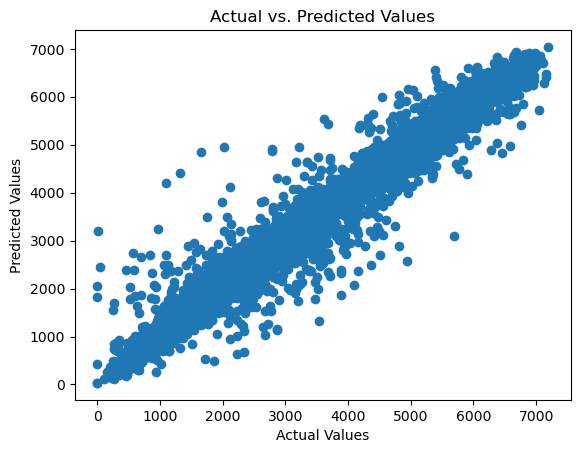

In [72]:
import matplotlib.pyplot as plt

plt.scatter(y2_test, y_pred_gb)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

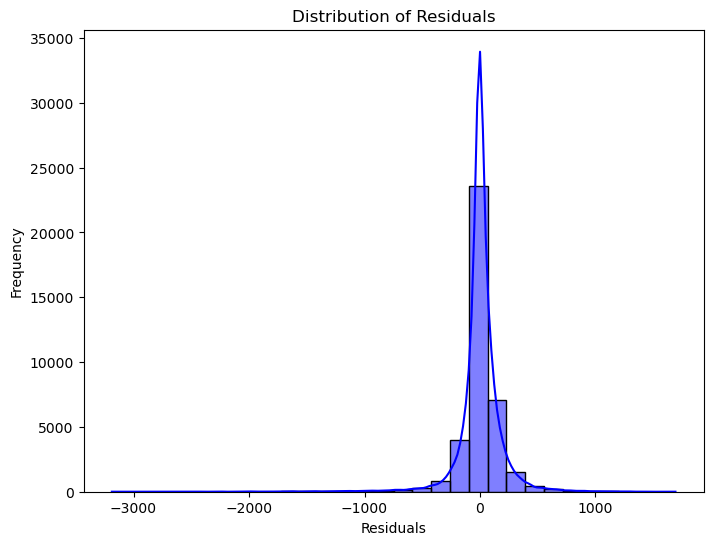

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resudials
best_rf.fit(X2_train, y2_train)

y_train_pred_gb = best_rf.predict(X2_train)

residuals = y2_train - y_train_pred_gb

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# *Conclusion*

In conclusion, the performance of various regression models was evaluated for predicting Metro Interstate Traffic Volume. The following table summarizes the key metrics for each model and encoding method:

| Model                    | MSE             | R-squared      | MAE             |
|--------------------------|-----------------|----------------|-----------------|
| Random Forest (One Hot Encoded)  | 139,696.76      | 0.9647         | 202.03          |
| Decision Tree (Not Encoded) | 229,138.86      | 0.9420         | 240.05          |
| Gradient Boosting (Label Encoded)| 302,290.58      | 0.9235         | 163.80          |


### Key Findings

- **Random Forest (One Hot Encoded):** The Random Forest model with One Hot Encoding outperformed other models, exhibiting the lowest MSE and highest R-squared score. This suggests that the ensemble approach and feature encoding method significantly contributed to its predictive accuracy.

- **Decision Tree (Not Encoded):** Despite not using encoding, the Decision Tree model demonstrated robust performance, especially in terms of R-squared. This highlights the inherent capacity of decision trees to capture complex relationships.

- **Gradient Boosting (Label Encoded):** Gradient Boosting with Label Encoding provided valuable insights, albeit with a slightly higher MSE. The trade-off between accuracy and interpretability should be considered.

### Performance Comparison of Regression Models

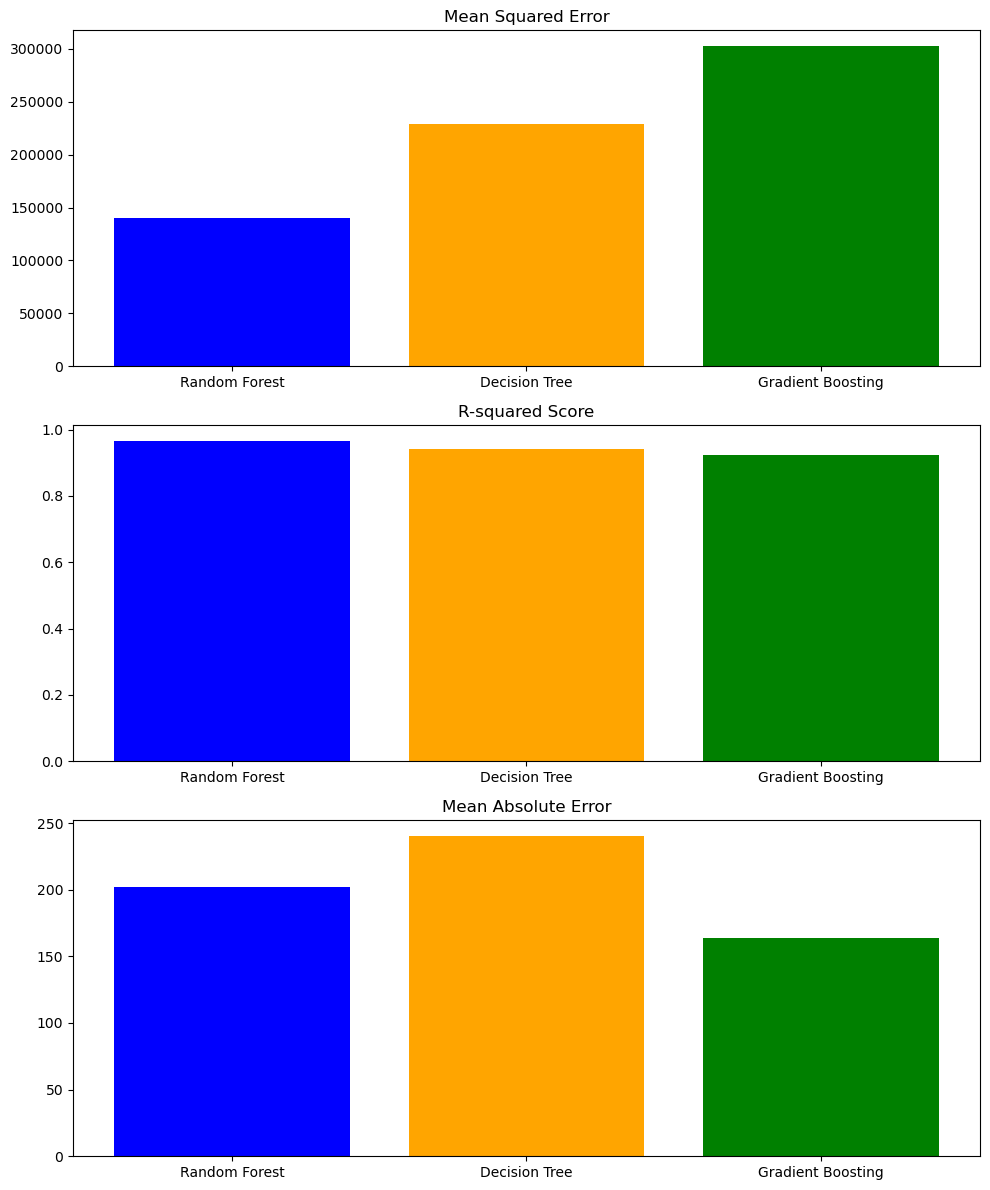

In [74]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'Gradient Boosting']
mse_values = [139696.76, 229138.86, 302290.58]
r_squared_values = [0.9647, 0.9420, 0.9235]
mae_values = [202.03, 240.05, 163.80]  # Replace [MAE Value] with actual values

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plotting MSE
axs[0].bar(models, mse_values, color=['blue', 'orange', 'green'])
axs[0].set_title('Mean Squared Error')

# Plotting R-squared
axs[1].bar(models, r_squared_values, color=['blue', 'orange', 'green'])
axs[1].set_title('R-squared Score')

# Plotting MAE
axs[2].bar(models, mae_values, color=['blue', 'orange', 'green'])
axs[2].set_title('Mean Absolute Error')

plt.tight_layout()
plt.show()


### Interactive Feature Distribution Analysis for Top Errors

You can see in the form of plots how the selected features differ between the overall dataset and the examples where each model made the most significant errors in predicting the target variable

In [75]:
import ipywidgets as widgets
from IPython.display import display

# Calculate residuals for the test set
residuals_rf = y1_test - y_pred_rf

# Set the percentage of instances to focus on (e.g., top 5%)
percentage_to_focus_rf = 5

# Calculate N as a percentage of the total number of instances
N_rf = int((percentage_to_focus_rf / 100) * len(y1_test))

top_errors_indices_rf = np.argsort(np.abs(residuals_rf))[::-1][:N_rf]
top_errors_rf = X1_test.iloc[top_errors_indices_rf]

# Function to plot feature distribution
def plot_feature_distribution(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(X1_test[feature], kde=True, color='blue', label='Overall')
    sns.histplot(top_errors_rf[feature], kde=True, color='red', label=f'Top {N_rf} Errors')
    plt.title(f'Distribution of {feature} - Top {N_rf} Errors vs Overall (Random Forest)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

all_features = X1_test.columns.tolist()

# Widget
feature_selector = widgets.Dropdown(
    options=all_features, 
    description='Select Feature for Random Forest', 
    style={'description_width': 'initial'}
)
display(feature_selector)

def on_feature_change(change):
    selected_feature = change['new']
    plot_feature_distribution(selected_feature)

feature_selector.observe(on_feature_change, names='value')


Dropdown(description='Select Feature for Random Forest', options=('temp', 'rain_1h', 'snow_1h', 'clouds_all', …

In [76]:
# Calculate residuals for the test set
residuals_dt = y_test - y_pred_dt

# Set the percentage of instances to focus on (e.g., top 5%)
percentage_to_focus_dt = 5

# Calculate N as a percentage of the total number of instances
N_dt = int((percentage_to_focus_dt / 100) * len(y_test))

top_errors_indices_dt = np.argsort(np.abs(residuals_dt))[::-1][:N_dt]
top_errors_dt = X_test.iloc[top_errors_indices_dt]

# Function to plot feature distribution
def plot_feature_distribution_dt(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(X_test[feature], kde=True, color='blue', label='Overall')
    sns.histplot(top_errors_dt[feature], kde=True, color='red', label=f'Top {N_dt} Errors')
    plt.title(f'Distribution of {feature} - Top {N_dt} Errors vs Overall (Decision Tree)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

all_features_dt = X_test.columns.tolist()

# Widget
feature_selector = widgets.Dropdown(
    options=all_features, 
    description='Select Feature for Decision Tree', 
    style={'description_width': 'initial'}
)
display(feature_selector)

def on_feature_change(change):
    selected_feature = change['new']
    plot_feature_distribution(selected_feature)

feature_selector.observe(on_feature_change, names='value')

Dropdown(description='Select Feature for Decision Tree', options=('temp', 'rain_1h', 'snow_1h', 'clouds_all', …

In [77]:
# Calculate residuals for the test set
residuals_gb = y2_test - y_pred_gb

# Set the percentage of instances to focus on (e.g., top 5%)
percentage_to_focus_gb = 5

# Calculate N as a percentage of the total number of instances
N_gb = int((percentage_to_focus_gb / 100) * len(y2_test))

top_errors_indices_gb = np.argsort(np.abs(residuals_gb))[::-1][:N_gb]
top_errors_gb = X2_test_encoded.iloc[top_errors_indices_gb]

# Function to plot feature distribution
def plot_feature_distribution_gb(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(X2_test_encoded[feature], kde=True, color='blue', label='Overall')
    sns.histplot(top_errors_gb[feature], kde=True, color='red', label=f'Top {N_gb} Errors')
    plt.title(f'Distribution of {feature} - Top {N_gb} Errors vs Overall (Gradient Boosting)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

all_features_gb = X2_test_encoded.columns.tolist()

# Widget
feature_selector = widgets.Dropdown(
    options=all_features, 
    description='Select Feature for Gradient Boosting', 
    style={'description_width': 'initial'}
)
display(feature_selector)

def on_feature_change(change):
    selected_feature = change['new']
    plot_feature_distribution(selected_feature)

feature_selector.observe(on_feature_change, names='value')

Dropdown(description='Select Feature for Gradient Boosting', options=('temp', 'rain_1h', 'snow_1h', 'clouds_al…

### Assessing Model Accuracy

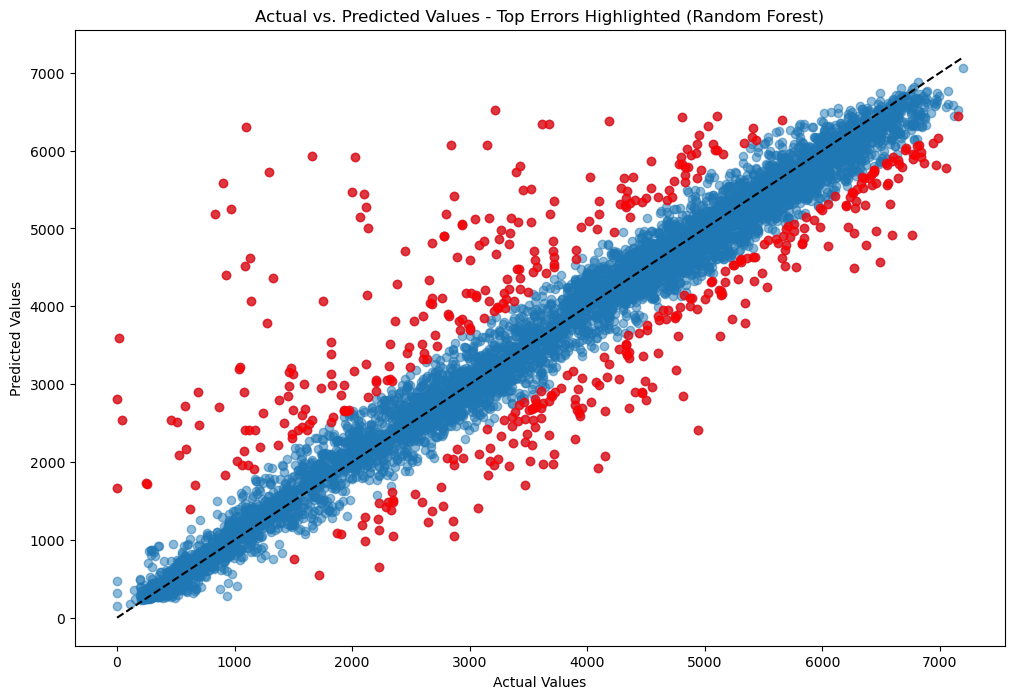

In [78]:
# Visualization for Random Forest
plt.figure(figsize=(12, 8))
plt.scatter(y1_test, y_pred_rf, alpha=0.5)
plt.scatter(y1_test.iloc[top_errors_indices_rf], y_pred_rf[top_errors_indices_rf], color='red', alpha=0.7)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], linestyle='--', color='black')
plt.title('Actual vs. Predicted Values - Top Errors Highlighted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

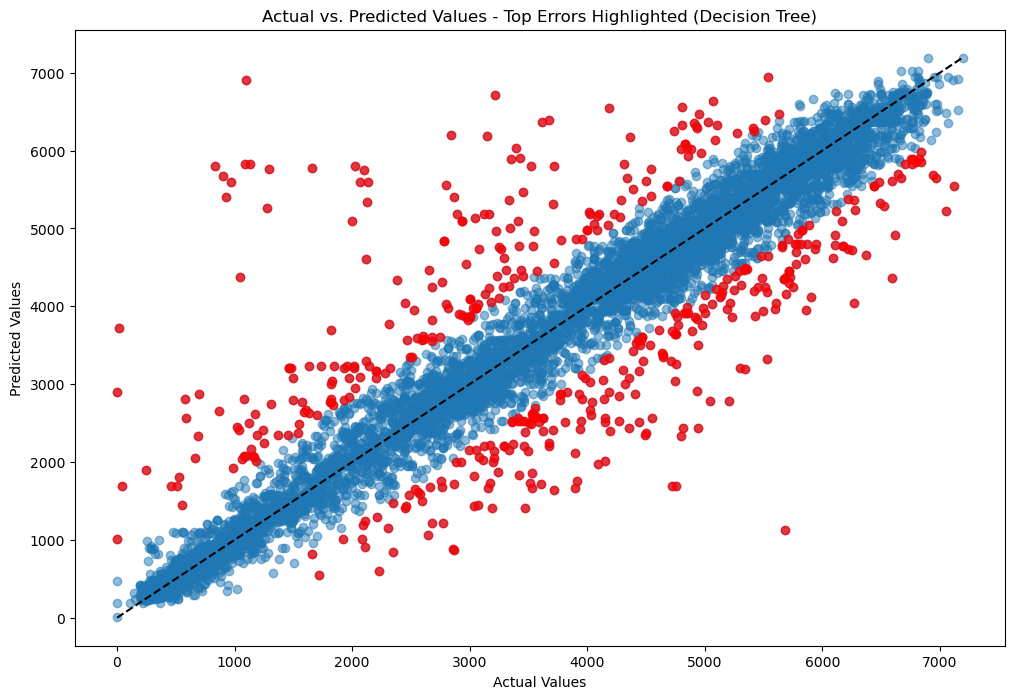

In [79]:
# Visualization for Decision Tree
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.scatter(y_test.iloc[top_errors_indices_dt], y_pred_dt[top_errors_indices_dt], color='red', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.title('Actual vs. Predicted Values - Top Errors Highlighted (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

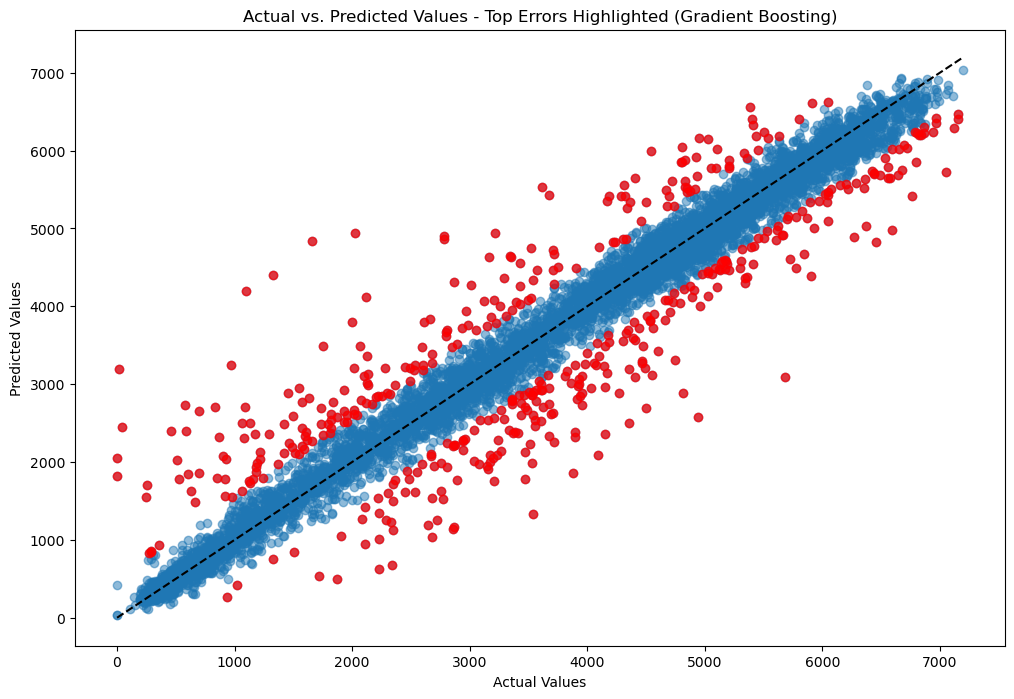

In [80]:
# Visualization for Gradient Boosting
plt.figure(figsize=(12, 8))
plt.scatter(y2_test, y_pred_gb, alpha=0.5)
plt.scatter(y2_test.iloc[top_errors_indices_gb], y_pred_gb[top_errors_indices_gb], color='red', alpha=0.7)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], linestyle='--', color='black')
plt.title('Actual vs. Predicted Values - Top Errors Highlighted (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# **Which is the best model and why?**

**In examining the performance of various regression models for predicting Metro Interstate Traffic Volume, the Random Forest model equipped with One Hot Encoding emerged as the standout performer. This model exhibited a remarkable combination of lower Mean Squared Error (MSE) and higher R-squared compared to its counterparts, underscoring its exceptional predictive accuracy.**

**The key to the Random Forest model's success lies in its ensemble approach, which harnesses the collective strength of multiple decision trees. By aggregating predictions from diverse trees, the model not only mitigates overfitting but also leverages the unique insights each tree provides. The incorporation of One Hot Encoding further enhanced its ability to handle categorical features, contributing to the model's comprehensive understanding of the complex relationships within the dataset.**

**In conclusion, the Random Forest model with One Hot Encoding stands as a compelling choice for predicting Metro Interstate Traffic Volume, offering a winning combination of accuracy, robustness, and feature handling capabilities**